<center><h1>MovieLens</h1></center>

El grupo de búsqueda <strong>GroupLens</strong> proporciona información sobre las puntuaciones de películas coleccionadas de usuarios de <strong>MovieLens</strong> a finales de los 1990 y principios de los 2000.

El conjunto de datos que utilizaremos contiene 1 milión de puntuaciones coleccionadas de 6000 usuarios en 4000 películas. 

Se extiende en 3 tablas: 
* ratings
* user information
* movie information

La información que podremos sacar de estas tablas:
* user_id (id del usuario)
* gender (género)
* age (edad)
* occupation (ocupación)
* zip
* movie_id (id de la película)
* title (título de la película)
* genres (género de la película)
* rating (puntuación de la película)
* timestamp (fecha y hora)


In [1]:
# Importaciones
import pandas as pd
import os
encoding = 'latin1'

%matplotlib inline

Lo primero que haremos es leer todos los ficheros y darle un formato de tabla:

In [6]:
upath = os.path.expanduser('data/users.dat')
rpath = os.path.expanduser('data/ratings.dat')
mpath = os.path.expanduser('data/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)


/home/jaimescript/.local/lib/python3.5/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/jaimescript/.local/lib/python3.5/site-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/jaimescript/.local/lib/python3.5/site-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [10]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
ratings[:10]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [12]:
users[:10]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


<h2>Explicación de los ficheros:</h2>

<strong>ratings.dat:</strong>

UserID::MovieID::Rating::Timestamp<br>

Ratings → Estan hechos en escala de 5 estrellas<br>
Timestamps → Es representado en segundos desde el epoch como devuelto por time(2)<br>
Cada usuario tiene al menos 20 puntuaciones.<br>

<strong>users.dat:</strong>

UserID::Gender::Age::Occupation::Zip-code<br>

Gender (Género) es denotado por “M” para hombre y “F” para mujer.
Age es elegido de los siguientes rangos:

1 → Menor de 18 años<br>
18 → 18-24<br>
25 → 25-34<br>
35 → 35-44<br>
45 → 45-49<br>
50 → 50-55<br>
56 → 56+

Ocupación es elegido de las siguientes elecciones:

0 → “otro” o no especificado<br>
1 → Academico/educador<br>
2 → Artista<br>
3 → Clerical (eclesiastico)/admin<br>
4 → Universidad/ grad student<br>
5 → Servicio al cliente<br>
6 → Doctor/ health care<br>
7 → Executive/managerial<br>
8 → Agricultor<br>
9 → Ama de casa<br>
10 → K-12 student<br>
11 → Abogado<br>
12 → Programador<br>
13 → Retirado<br>
14 → Escamas/marketing<br>
15 → Cientifico<br>
16 → Trabajadores por cuenta propia<br>
17 → Técnico/ ingeniero<br>
18 → Comerciante/ artesano<br>
19 → Desempleado<br>
20 → Escritor

<strong>movies.dat:</strong>

MovieID::Title::Genres<br>

Géneros:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western


Lo primero que haremos es unir las tres tablas en una llamada 'data':

In [13]:
data = pd.merge(pd.merge(ratings, users), movies)
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


Visualizamos el número de veces que se ha votado una determinada estrella de puntuación:

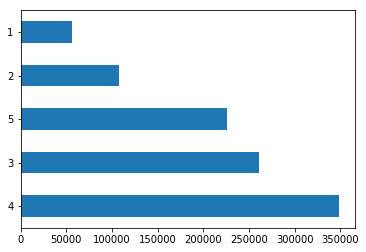

In [14]:
ratings_counts = data['rating'].value_counts()
ratings_counts.plot(kind='barh', stacked=True)

Ahora vamos a calcular la media de puntuaciones agrupado por género:

In [15]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


Aún teniendo las medias no nos podemos fiar ya que no sabemos de momento el número de veces que ha sido puntuada una película. Para ello lo primero que haremos es mirar el número de veces que ha sido votada una película:

In [16]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

Queremos obtener los títulos de películas que tengan como mínimo 250 votaciones:

In [17]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

Ahora solo tendremos en cuenta la media de las películas que han sido votadas como mínimo 250 veces.

In [18]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


Podemos ordenar la columna 'F' (Mujer) en orden descendente.

In [19]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Ahora queremos encontrar las películas que son más divisivas entre hombre y mujeres. Para ello añadiremos una columna 'mean_ratings' la cuál contiene la diferencia en medias:

In [23]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings[:10]

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


Ahora queremos ver en que películas hay la mayor diferencia de puntuación y que fueron preferidas para las mujeres:

In [28]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Ahora queremos las mayor diferencia de puntución pero esta vez que fueron preferidas por los hombres:

In [30]:
#Alternativa -> sorted_by_diff = mean_ratings.sort_values(by='diff', ascending=False)
sorted_by_diff[::-1][:15]
sorted_by_diff[:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Podemos medir el desacuerdo mediante la varianza o desviación standard de las puntuaciones:

In [32]:
# Desviación standard agrupada por título
rating_std_by_title = data.groupby('title')['rating'].std()

rating_std_by_title = rating_std_by_title.ix[active_titles]

rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64